# Operations Research Final Project code

By Francisco Herrero & Maria Paula Cedeño

# Congressional Redistricting in Arkansas in 2020

In [2]:
#Import the necessary packages

import gurobipy as gp
from gurobipy import GRB

import json
from networkx.readwrite import json_graph

def read_graph_from_json(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return json_graph.adjacency_graph(data) 

#Set filepath and read data

filepath = 'C:/Users/franc/OneDrive/Desktop/Work/Fall 2023/Deterministic Operations Research/Project/Data Sets/AR_county.json'

G = read_graph_from_json(filepath)

In [3]:
#Assign each node in G to the population of their respective county

for node in G.nodes:
    G.nodes[node]['TOTPOP'] = G.nodes[node]['P0010001']
    
#Print each node
    
for node in G.nodes:
    county_name = G.nodes[node]['NAME20']
    county_population = G.nodes[node]['TOTPOP']
    print("Node",node,"corresponds to the county",county_name,"which had a population of",county_population,"in 2020")

Node 0 corresponds to the county Franklin which had a population of 17097 in 2020
Node 1 corresponds to the county Crawford which had a population of 60133 in 2020
Node 2 corresponds to the county Jackson which had a population of 16755 in 2020
Node 3 corresponds to the county Clay which had a population of 14552 in 2020
Node 4 corresponds to the county Faulkner which had a population of 123498 in 2020
Node 5 corresponds to the county Baxter which had a population of 41627 in 2020
Node 6 corresponds to the county Little River which had a population of 12026 in 2020
Node 7 corresponds to the county Boone which had a population of 37373 in 2020
Node 8 corresponds to the county Ashley which had a population of 19062 in 2020
Node 9 corresponds to the county Desha which had a population of 11395 in 2020
Node 10 corresponds to the county St. Francis which had a population of 23090 in 2020
Node 11 corresponds to the county Montgomery which had a population of 8484 in 2020
Node 12 corresponds 

According to congressional law, population deviation must not exceed 1% In other words, the difference in population between the largest and smallest district must not exceed 1%

From data, 

Total population: 3011524

Ideal population per district: 752881
    
Desired districts: 4
    
Highest acceptable population = 1.005 x 752,881 = 756,645. 
    
Lowest acceptable population = 0.995 x 752,881 = 749,116. 

In [4]:
k = 4

L = 749116
U = 756645

In [5]:
#Create the model

m = gp.Model()

# Decision Variables

x = m.addVars(G.nodes, k, vtype = GRB.BINARY) #x[i,j] equals 1 when county i is assigned to district j, 0 otherwise
y = m.addVars(G.edges, vtype = GRB.BINARY) #y[u,v] equals 1 when edge {u,v} is cut

Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-10


In [6]:
#Create objective function to minimize cut edges (compactness)

m.setObjective(gp.quicksum(y), GRB.MINIMIZE)

In [7]:
#Create constraints

#1. Each county can only be assigned to one district

m.addConstrs(gp.quicksum(x[i,j] for j in range(k)) == 1 for i in G.nodes)

#2. Population deviation must not exceed 1%. As such, district populations must not exceed L and U.

m.addConstrs(gp.quicksum(G.nodes[i]['TOTPOP'] * x[i,j] for i in G.nodes ) >= L for j in range(k))
m.addConstrs(gp.quicksum(G.nodes[i]['TOTPOP'] * x[i,j] for i in G.nodes ) <= U for j in range(k))

#3. To ensure compactness, edge {u,v} must be cut if county u is assigned to district j but adjacent county v is not.

m.addConstrs(x[u,j] - x[v,j] <= y[u,v] for u,v in G.edges for j in range(k))

m.update()

m.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 851 rows, 492 columns and 3204 nonzeros
Model fingerprint: 0x26d8c597
Variable types: 0 continuous, 492 integer (492 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve time: 0.01s
Presolved: 851 rows, 492 columns, 3204 nonzeros
Variable types: 0 continuous, 492 integer (492 binary)
Found heuristic solution: objective 121.0000000
Found heuristic solution: objective 114.0000000

Root relaxation: objective 0.000000e+00, 459 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     

In [8]:
#Compactness results

print("The number of cut edges is", m.objval)

The number of cut edges is 33.0


Now, we can display the lists of counties in the four districts and their total populations

In [9]:
districts = [[i for i in G.nodes if x[i,j].x > 0.5] for j in range(k)]
district_county_names = [[G.nodes[i]['NAME20'] for i in district] for district in districts]
district_populations = [sum( G.nodes[i]['TOTPOP'] for i in district ) for district in districts]

for j in range(k):
    print("District",j+1,"has these counties =",district_county_names[j],"and this population =",district_populations[j] )
    print("")

District 1 has these counties = ['Franklin', 'Crawford', 'Benton', 'Madison', 'Sebastian', 'Washington'] and this population = 751754

District 2 has these counties = ['Little River', 'Ashley', 'Desha', 'Montgomery', 'Howard', 'Nevada', 'Grant', 'Dallas', 'Cleveland', 'Lafayette', 'Chicot', 'Pope', 'Bradley', 'Drew', 'Pike', 'Union', 'Hempstead', 'Polk', 'Clark', 'Logan', 'Miller', 'Arkansas', 'Johnson', 'Garland', 'Sevier', 'Jefferson', 'Lincoln', 'Scott', 'Hot Spring', 'Columbia', 'Ouachita', 'Yell', 'Calhoun', 'Phillips'] and this population = 754547

District 3 has these counties = ['Faulkner', 'Conway', 'Pulaski', 'Saline', 'Lonoke', 'Perry'] and this population = 750788

District 4 has these counties = ['Jackson', 'Clay', 'Baxter', 'Boone', 'St. Francis', 'Sharp', 'Greene', 'Woodruff', 'White', 'Lee', 'Crittenden', 'Marion', 'Prairie', 'Lawrence', 'Poinsett', 'Stone', 'Independence', 'Fulton', 'Carroll', 'Van Buren', 'Searcy', 'Randolph', 'Izard', 'Craighead', 'Cleburne', 'Monroe

As we can see in the results above, the largest district population was 754,547 and the lowest was 750,788, which do not exceed L (749,116) and U (756,645), so the 1% deviation rule is respected.

Now, we check if the districts are all contiguous in this solution.

In [11]:
import networkx as nx
for j in range(k):
    print("Is district", j+1, "connected?", nx.is_connected(G.subgraph(j)))

Is district 1 connected? True
Is district 2 connected? True
Is district 3 connected? True
Is district 4 connected? True


Thankfully, our districts are all already contiguous, so there is no need to do extra work to implement contiguity constraints!

Finally, we can use geopandas to visualize our new redistricting plan in a map!

In [12]:
import geopandas as gpd

filepath2 = 'C:/Users/franc/OneDrive/Desktop/Work/Fall 2023/Deterministic Operations Research/Project/Shapefile/AR_counties.shp'
mapdata = gpd.read_file(filepath2)

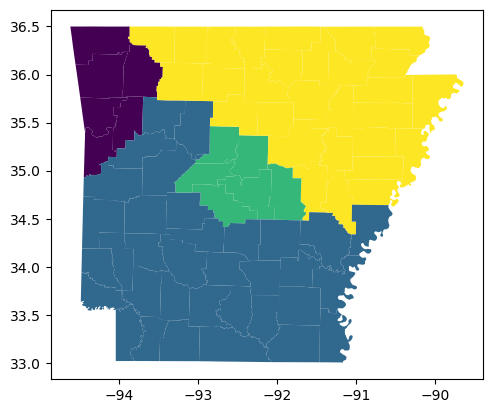

In [13]:
#County assignment to corresponding district
assign = [-1 for i in G.nodes]
label = {i : j for i in G.nodes for j in range(k) if x[i,j].x > 0.5}

#Mapping the column assignment
node_assignment = {G.nodes[i]['GEOID20'] : i for i in G.nodes}

#Picking a position u in the dataframe
for u in range(G.number_of_nodes()):
    
    geoid = mapdata['GEOID20'][u]
    
    #What node in G is this assigned to?
    i = node_assignment[geoid]
    
    #Give the same district number to position u that the corresponding county i has.
    assign[u] = label[i]
    
#Add the assignments to a column of our dataframe and then map it
mapdata['assignment'] = assign

my_map = mapdata.plot(column='assignment').get_figure()

This concludes our Arkansas redistricting for the 2020 census project!

Shapefile data for Arkansas counties were obtained from Eugene Lykhovyd's index of files on US counties.

JSON file data for Arkansas was obtained from logandavis2518's IEM40132020RedistrictingProject repository on GitHub.

Special thanks and reference to AustinLBuchanan's Districting-Examples-2020 on Github. Code originating from there was used as a reference especially for the constraints and visual mapping sections of the code. The idea to utilize a JSON file for the primary data source and to use NetworkX to read that data also originated from this repository. 